# Rain fall in India Analysis.

libraries used in the analysis.

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
#This function is used to show mean absolute parcentage error(MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#This function is used plot the Mean Absolute Percentage Error.
def error_plot(y_true,y_pred):
    
    import numpy as np
    import matplotlib.pyplot as plt

    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    
    error_percentage=mean_absolute_percentage_error(y_true, y_pred)
    no_error_percentage=(100-error_percentage)
    
    #preparing the data for plotting.
    names=['error_percentage : '+str(error_percentage)+"%",'correct_percentage : '+str(no_error_percentage)+"%"]
    size=[error_percentage,no_error_percentage]
    
    # Create a circle for the center of the plot
    my_circle=plt.Circle( (0,0), 0.7, color='white')


    
    # Give color names
    plt.pie(size, labels=names, colors=['orange','blue'])
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title("The Mean Absolute Percentage Error")
    plt.show()    

In [3]:
data=pd.read_csv("Sub_Division_IMD_2017.csv")
print(data.head(5))

                 SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  Andaman & Nicobar Islands  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  Andaman & Nicobar Islands  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  Andaman & Nicobar Islands  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  Andaman & Nicobar Islands  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  Andaman & Nicobar Islands  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL     JF    MAM    JJAS  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2  136.3  560.3  1696.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7  159.8  458.3  2185.9   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4  156.7  236.1  1874.0   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6   24.1  506.9  1977.6   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7    1.3  309.7  1624.9   

     OND  
0  980.3  
1  716.7  
2  690.6  
3  571.0  
4  630.8  


In [4]:
#checking the NA 'S in the data set'
data.isna().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
JF              6
MAM             9
JJAS           10
OND            13
dtype: int64

In [5]:
#data.loc[data['SUBDIVISION']=="Andaman & Nicobar Islands"]['YEAR']
#data.SUBDIVISION.value_counts()
null_data = data[np.logical_or.reduce(data.isnull(), axis=1)]
data=data.dropna()
data.SUBDIVISION.unique()

array(['Andaman & Nicobar Islands', 'Arunachal Pradesh',
       'Assam & Meghalaya', 'Naga Mani Mizo Tripura',
       'Sub Himalayan West Bengal & Sikkim', 'Gangetic West Bengal',
       'Orissa', 'Jharkhand', 'Bihar', 'East Uttar Pradesh',
       'West Uttar Pradesh', 'Uttarakhand', 'Haryana Delhi & Chandigarh',
       'Punjab', 'Himachal Pradesh', 'Jammu & Kashmir', 'West Rajasthan',
       'East Rajasthan', 'West Madhya Pradesh', 'East Madhya Pradesh',
       'Gujarat Region', 'Saurashtra & Kutch', 'Konkan & Goa',
       'Madhya Maharashtra', 'Matathwada', 'Vidarbha', 'Chhattisgarh',
       'Coastal Andhra Pradesh', 'Telangana', 'Rayalseema', 'Tamil Nadu',
       'Coastal Karnataka', 'North Interior Karnataka',
       'South Interior Karnataka', 'Kerala', 'Lakshadweep'], dtype=object)

In [6]:
#Again checking if there is NA 's in the data.
data.isna().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
JF             0
MAM            0
JJAS           0
OND            0
dtype: int64

we are considering these states for analysis because we can compare different rain fall matrix from different parts of country.
Tamil Nadu
Jammu & Kashmir
Madhya Maharashtra
Gujarat Region
Assam & Meghalaya

In [7]:
data.loc[data['SUBDIVISION']== "Tamil Nadu"]
data['YEAR']=pd.to_datetime(data['YEAR'],format='%Y')
#data['YEAR'] = data['YEAR'].dt.year

In [8]:
Tamil_Nadu= data.loc[data['SUBDIVISION'] == 'Tamil Nadu']
Tamil_Nadu.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JF', 'MAM', 'JJAS',
       'OND'],
      dtype='object')

# Data Preprocessing

In [9]:
cols = ['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'JF', 'MAM', 'JJAS',
       'OND']
Tamil_Nadu.drop(cols, axis=1, inplace=True)
Tamil_Nadu = Tamil_Nadu.sort_values('YEAR')
print(Tamil_Nadu.head(3))
Tamil_Nadu.isnull().sum()

           YEAR  ANNUAL
3487 1901-01-01   960.3
3488 1902-01-01  1138.2
3489 1903-01-01  1163.9


YEAR      0
ANNUAL    0
dtype: int64

# Indexing with Time Series Data

In [10]:
Tamil_Nadu = Tamil_Nadu.set_index('YEAR')

In [11]:
Tamil_Nadu.head(3)

,ANNUAL
YEAR,
1901-01-01,960.3
1902-01-01,1138.2
1903-01-01,1163.9


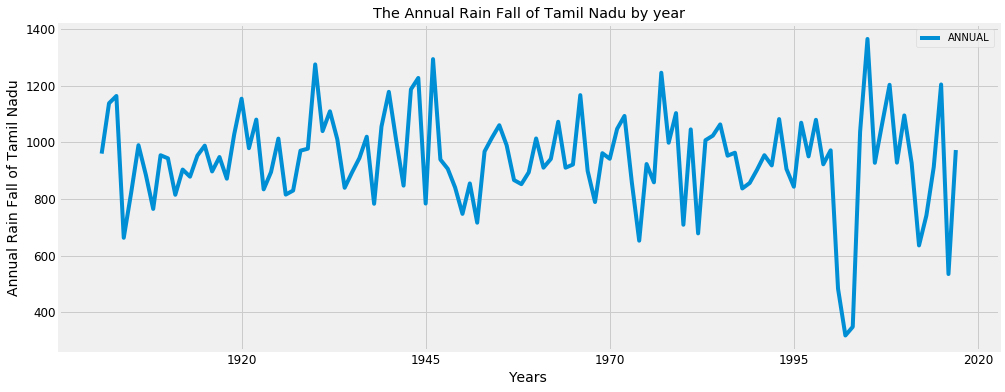

In [12]:
Tamil_Nadu.plot(figsize=(15, 6))

plt.xlabel('Years')
plt.ylabel('Annual Rain Fall of Tamil Nadu')
plt.title("The Annual Rain Fall of Tamil Nadu by year")
plt.show()

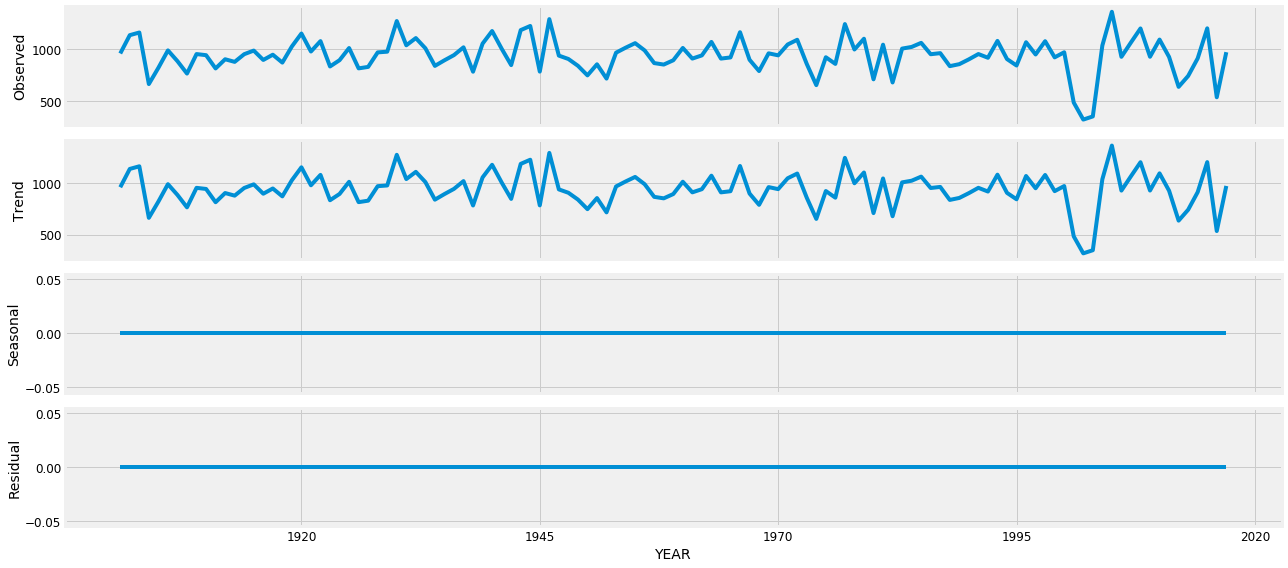

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(Tamil_Nadu, model='additive')
fig = decomposition.plot()
plt.show()

# Time series forecasting with ARIMA

In [14]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [15]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Tamil_Nadu,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1923.1943606774703


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1629.2740630817848
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1430.8613650907555
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1237.3350511010897
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1444.4383315652535
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1399.0811528899567
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1259.4944838235847


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1239.305931843207
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1792.7090173664458
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1549.2392879165475


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1415.8436388075736
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1221.4158334452227


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1442.1157960189034


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1421.5086688434649
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1257.9896741799646
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1223.414977952977
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1563.300928613183
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1405.6513433100788
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1468.5074804938213


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1265.1446613187709
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1418.3909086665954
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1407.6504655354538
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1290.9838867986923


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1266.6498912343563
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1502.9484215884318
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1350.711739149761


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1410.641011384906


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1215.21087676747
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1375.33571980943


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1352.7002409459715


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:1253.1852316720895


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1217.1850675961266
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1577.1062819707838
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1419.208092346903
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:1429.7106141139495


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1235.2787027744973
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1429.8274232431568


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1395.872645193842
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:1245.526105514236


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1237.2777812716201
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1519.4155556713652


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1365.4553504594323
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:1417.8127838731978


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1223.1413558970855
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1378.153518162916


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1384.1730809068379
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:1247.3131547170033


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1225.1413229223388
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1547.0426753946058
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1390.1462938028271
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1457.6895943078139


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1253.8690112271593
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1390.1566944195238
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1392.1409445355014


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:1265.2260078229617


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1255.5163154826969
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1500.639195804481


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1348.9093849212297
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:1409.4619567183904


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1213.6633499706647
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1361.1131969648259


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1350.8923078858586


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:1236.9494658876736


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1215.6627537839665


# Fitting the ARIMA model

In [16]:
mod = sm.tsa.statespace.SARIMAX(Tamil_Nadu,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1954      0.072      2.728      0.006       0.055       0.336
ma.L1         -1.0000      0.145     -6.918      0.000      -1.283      -0.717
ma.S.L12      -0.7853      0.146     -5.381      0.000      -1.071      -0.499
sigma2      3.474e+04   4.16e-06   8.35e+09      0.000    3.47e+04    3.47e+04


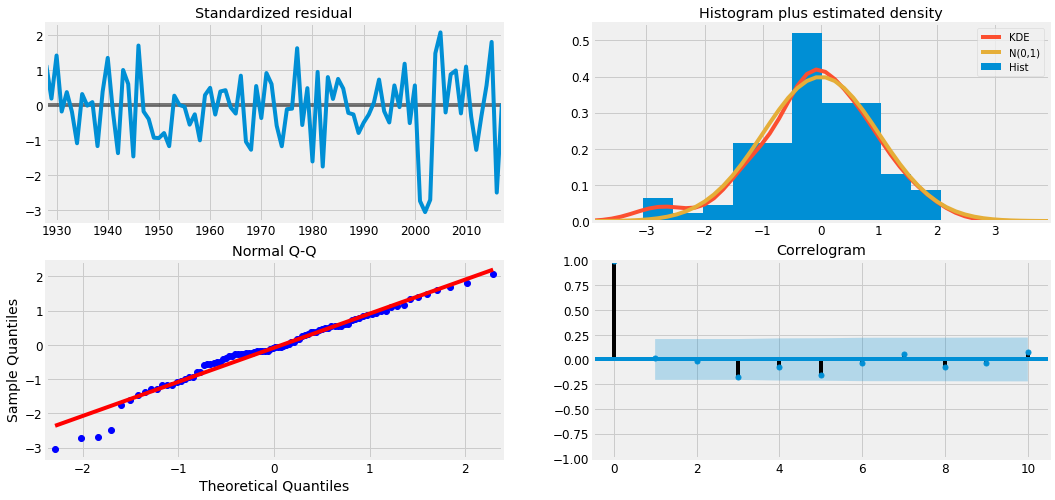

In [17]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

# Validating forecasts

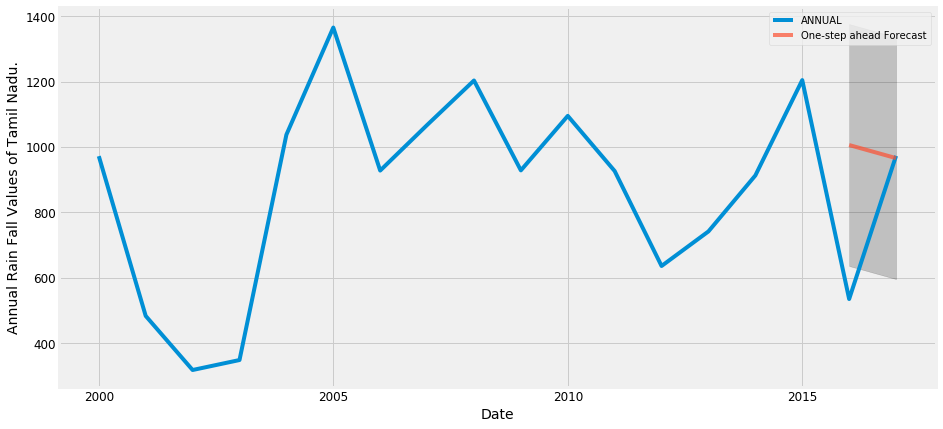

In [18]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'),end=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = Tamil_Nadu['2000':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Annual Rain Fall Values of Tamil Nadu.')
plt.legend()
plt.show()

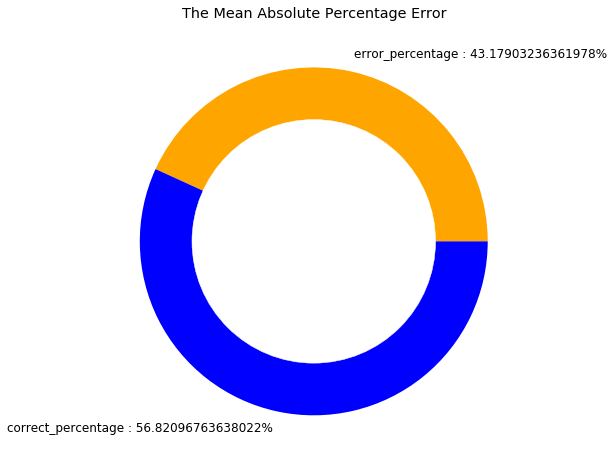

In [21]:
y_forecasted = pred.predicted_mean
y_truth = Tamil_Nadu['2016-01-01':]
error_plot(y_truth,y_forecasted)

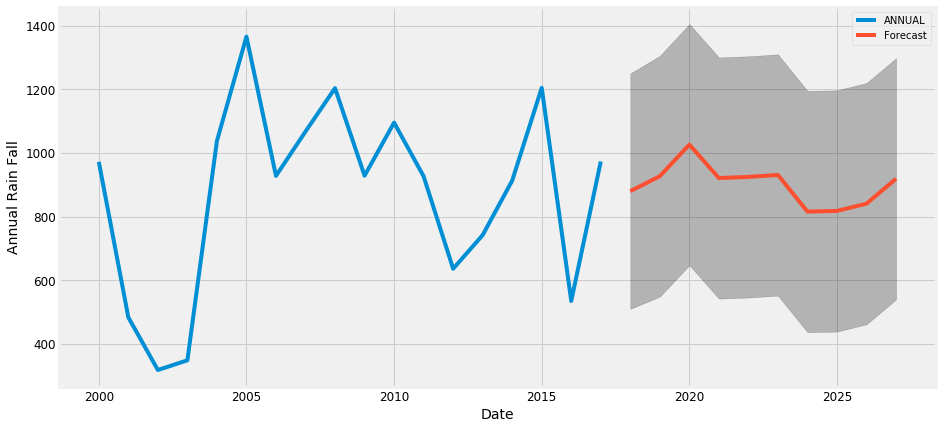

In [20]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = Tamil_Nadu['2000-01-01':].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Annual Rain Fall')
plt.legend()
plt.show()

# Holt Winter and Exponential Smoothing 

In [1]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train, test = MH.iloc[:105], MH.iloc[105:]

y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['ANNUAL']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['ANNUAL'], label='Train')
plt.plot(test['ANNUAL'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

NameError: name 'MH' is not defined